In [1]:
import pandas as pd
#import pingouin as pg

from PCAlgo import PC
from scipy.stats import spearmanr
from datagenerator import *
import matplotlib.pyplot as plt

import networkx as nx
#import numpy as np

c:\Users\39331\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Create a directed graph
G = nx.DiGraph()
G.add_edges_from([
    ("A", "B"),
    ("C", "B"),
    ("C", "D"),
    ("D", "E")
])

# Parameters
alpha = 0.5  # Probability for root nodes
beta = 0.1   # Probability for child nodes
output_csv = "testdata/domino_data.csv"  # Output CSV file

# Generate domino-like model data and save to CSV
generate_domino_data(G, alpha, beta, output_csv, num_samples=10000)
print(f"Data saved to {output_csv}")

INFO:root:Complete graph created with 5 nodes and 10 edges
INFO:root:Skeleton graph created with 5 nodes and 4 edges
INFO:root:Triple orientation: DAG created with 5 nodes and 2 edges
INFO:root:Meeks Rules: DAG created with 5 nodes and 6 edges (undirectable edges: 2 ... 4 total edges)


{('A', 'C'): None, ('C', 'A'): None, ('A', 'D'): None, ('D', 'A'): None, ('A', 'E'): None, ('E', 'A'): None, ('C', 'E'): {'D'}, ('E', 'C'): {'D'}, ('B', 'D'): {'C'}, ('D', 'B'): {'C'}, ('B', 'E'): {'D'}, ('E', 'B'): {'D'}}


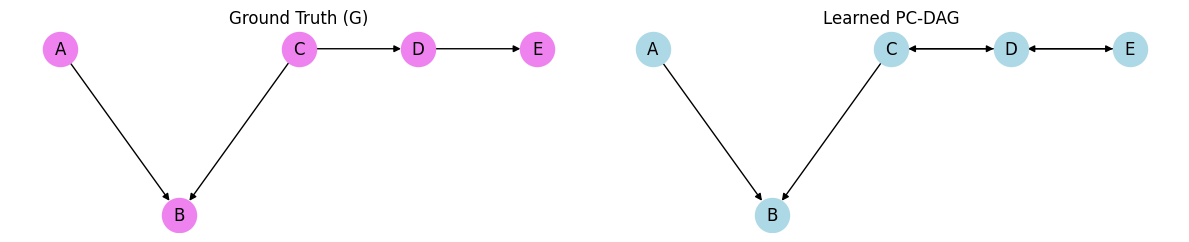

In [35]:
##############################
# Create a directed graph
G = nx.DiGraph()
G.add_edges_from([
    ("A", "B"),
    ("C", "B"),
    ("C", "D"),
    ("D", "E")
])

pos = {
    "A": (0, 1),
    "B": (1, 0),
    "C": (2, 1),
    "D": (3, 1),
    "E": (4, 1)
}

# Parameters
alpha = 0.5  # Probability for root nodes
beta = 0.1   # Probability for child nodes
output_csv = "testdata/domino_data1.csv"  # Output CSV file

# Generate domino-like model data and save to CSV
generate_domino_data(G, alpha, beta, output_csv, num_samples=10000)

# PC
test = pd.read_csv('testdata/domino_data1.csv', delimiter=',')
pc = PC(test, 0.025, indtest=spearmanr, debug=False)
pcdag = pc.runPC()

# Plot G and pcdag side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 2.53))

# Plot Ground Truth (G)
axes[0].set_title("Ground Truth (G)")
nx.draw(
    G, pos, ax=axes[0], with_labels=True,
    node_color='violet', node_size=600
)

# Plot PC-DAG (pcdag)
axes[1].set_title("Learned PC-DAG")
nx.draw(
    pcdag, pos, ax=axes[1], with_labels=True,
    node_color='lightblue', node_size=600
)

# Show the plots
plt.tight_layout()
plt.show()

INFO:root:Complete graph created with 6 nodes and 15 edges
INFO:root:Skeleton graph created with 6 nodes and 6 edges
INFO:root:Triple orientation: DAG created with 6 nodes and 4 edges
INFO:root:Meeks Rules: DAG created with 6 nodes and 7 edges (undirectable edges: 1 ... 6 total edges)


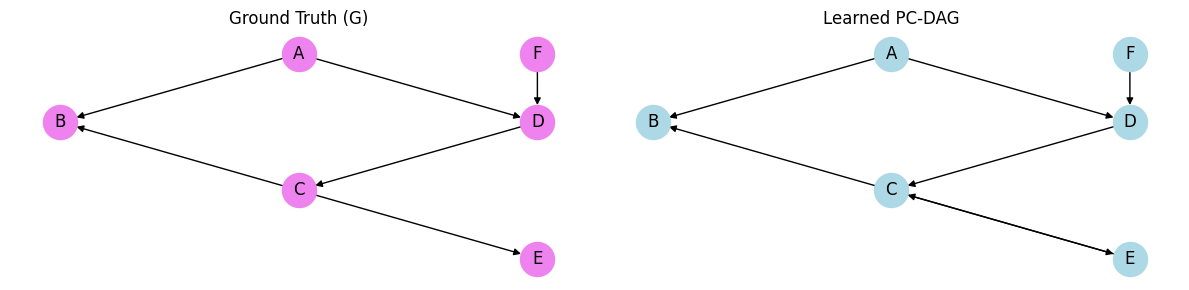

In [3]:
##############################
# Create a directed graph
G = nx.DiGraph()
G.add_edges_from([
    ("A", "B"),
    ("C", "B"),
    ("A", "D"),
    ("D", "C"),
    ("F", "D"),
    ("C", "E")
])

pos = {
    "A": (1, 3),
    "B": (0, 2),
    "C": (1, 1),
    "D": (2, 2),
    "E": (2, 0),
    "F": (2, 3)
}

# Parameters
alpha = 0.5  # Probability for root nodes
beta = 0.1   # Probability for child nodes
output_csv = "testdata/domino_data2.csv"  # Output CSV file

# Generate domino-like model data and save to CSV
generate_domino_data(G, alpha, beta, output_csv, num_samples=100000)

# PC
test = pd.read_csv('testdata/domino_data2.csv', delimiter=',')
pc = PC(test, 0.05, indtest=spearmanr, debug=False)
pcdag = pc.runPC()

# Plot G and pcdag side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

# Plot Ground Truth (G)
axes[0].set_title("Ground Truth (G)")
nx.draw(
    G, pos, ax=axes[0], with_labels=True,
    node_color='violet', node_size=600
)

# Plot PC-DAG (pcdag)
axes[1].set_title("Learned PC-DAG")
nx.draw(
    pcdag, pos, ax=axes[1], with_labels=True,
    node_color='lightblue', node_size=600
)

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
!py -3.12 -m pip install pgmpy.estimators.CITest

In [15]:
import pingouin as pg
from pgmpy.estimators.CITests import g_sq

#pg.partial_corr(test, "B", "D", covar={"A","C"}, method="spearman")
g_sq("B", "D", ["A","C"], test, boolean=False)[1]

0.8144294875401726

In [19]:
spearmanr(test[test["A"]==0][test["C"]==1]["B"],test[test["A"]==0][test["C"]==1]["D"])

C:\Users\39331\AppData\Local\Temp\ipykernel_18816\1407188418.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  spearmanr(test[test["A"]==0][test["C"]==1]["B"],test[test["A"]==0][test["C"]==1]["D"])
C:\Users\39331\AppData\Local\Temp\ipykernel_18816\1407188418.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  spearmanr(test[test["A"]==0][test["C"]==1]["B"],test[test["A"]==0][test["C"]==1]["D"])


SignificanceResult(statistic=-0.005527148915701502, pvalue=0.38353778002466854)

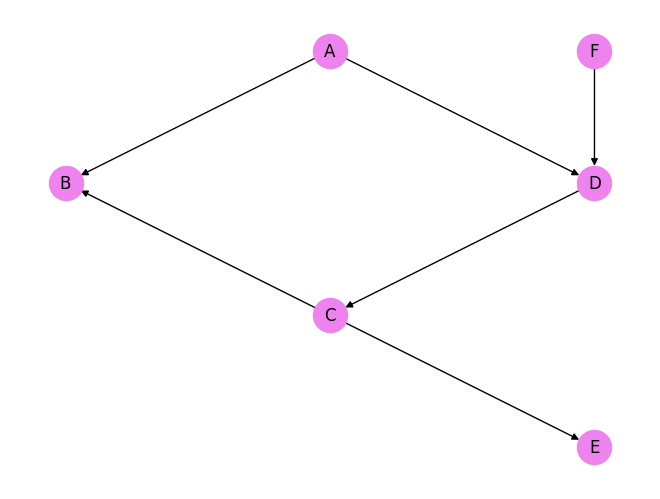

In [9]:
nx.draw(
    G, pos, with_labels=True,
    node_color='violet', node_size=600
)